<a href="https://www.kaggle.com/code/mrsimple07/clothes-data-eda-prediction?scriptVersionId=194607888" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clothes-price-prediction/clothes_price_prediction_data.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/clothes-price-prediction/clothes_price_prediction_data.csv')

df.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [3]:
df.describe()

,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000


In [4]:
df.shape

(1000, 6)

In [5]:
df.isnull().sum()

Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

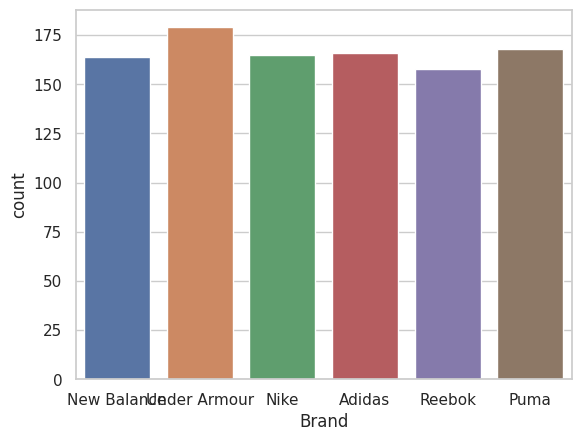

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

sns.countplot(data =df, x = df['Brand'])
plt.show()

#### Using Linear Regression to predict the price

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df)
X,y = df.drop(['Price'], axis =1), df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

3040.03
